# Model creation

In [1]:
%load_ext autoreload
%autoreload 2
from fastai.vision import *
from TensorBoardCallback import *

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

# Tensorboard import and callback

In [3]:
# Writer to tensorboard
writer = SummaryWriter(comment='Demo')

# Track_weight and track_grad are used to decide if weights and gradients will be logged in TensorBoard
# Metric names are names to be displayed in Tensorboard. The first is always validation loss
# The order of metric names has to be the same than in learn.metrics
mycallback = partial(TensorBoardFastAI, writer, track_weight=True, track_grad=True, metric_names=['val loss', 'accuracy'])


# Add the callback to the learn object
learn.callback_fns.append(mycallback)

# Training

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


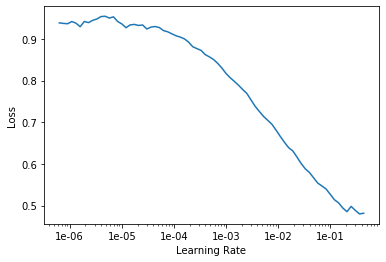

In [4]:
learn.lr_find()
learn.recorder.plot()

In [5]:
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.330914,0.165965,0.941609,00:03
1,0.105562,0.049819,0.984789,00:03
2,0.041786,0.027715,0.991659,00:03
3,0.031383,0.016471,0.997056,00:03
4,0.018601,0.014395,0.996075,00:03
5,0.012884,0.012744,0.996565,00:03
6,0.008870,0.011820,0.997056,00:03
7,0.007087,0.013150,0.997547,00:03
8,0.006200,0.012058,0.997056,00:03
9,0.004275,0.012808,0.997056,00:03


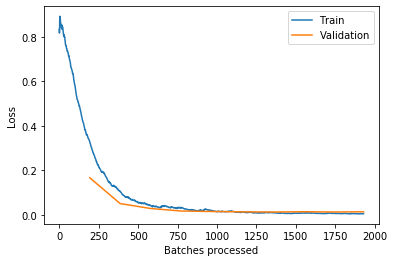

In [6]:
learn.recorder.plot_losses()